In [111]:
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 11


In [112]:


# Paleta
palette_hospitality = [
    "#1F3C4B", "#2C6E91", "#6B8E23", "#4F7C6B",
    "#E6D5B8", "#D8CFC4", "#C97C5D", "#C9A24D",
    "#4A4A4A", "#9E9E9E", "#F7F4EF", "#1C1C1C"
]

# Tema base Seaborn (afecta también a matplotlib)
sns.set_theme(
    style="whitegrid",
    palette=palette_hospitality,
    rc={
        # Tamaño de figuras
        "figure.figsize": (10, 6),

        # Títulos y labels
        "axes.titlesize": 14,
        "axes.labelsize": 12,

        # Líneas
        "lines.linewidth": 2,

        # Grid
        "grid.alpha": 0.3,

        # Tipografía
        "font.size": 11
    }
)

# Asegurar que matplotlib use exactamente la misma paleta
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette_hospitality)

In [113]:
df = pd.read_csv("df_limpio (1).csv")
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,momento_checkin,ratio_asistencia,ratio_cancelaciones_mes_respecto_reservas,zona_roja,estacion_estancia,estacion_reserva,antiguedad_hotel_en_dias,es_festivo,es_finde,city
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.25171,1,invierno,otoño,2123,False,False,Donostia
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.25171,1,invierno,invierno,2123,True,False,Donostia
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,antes,0.333333,0.25171,1,invierno,otoño,2123,True,False,Donostia
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,antes,0.500000,0.25171,1,invierno,otoño,2123,False,False,Donostia
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,antes,1.000000,0.25171,1,invierno,otoño,2123,False,False,Donostia


### Número de reservas por ciudad

Este gráfico muestra el volumen de reservas por ciudad, lo que permite evaluar la importancia turística relativa de cada localización dentro del negocio de Líbere.

Las ciudades con mayor número de reservas representan los principales focos de demanda y concentran una parte significativa de la actividad operativa de la compañía.


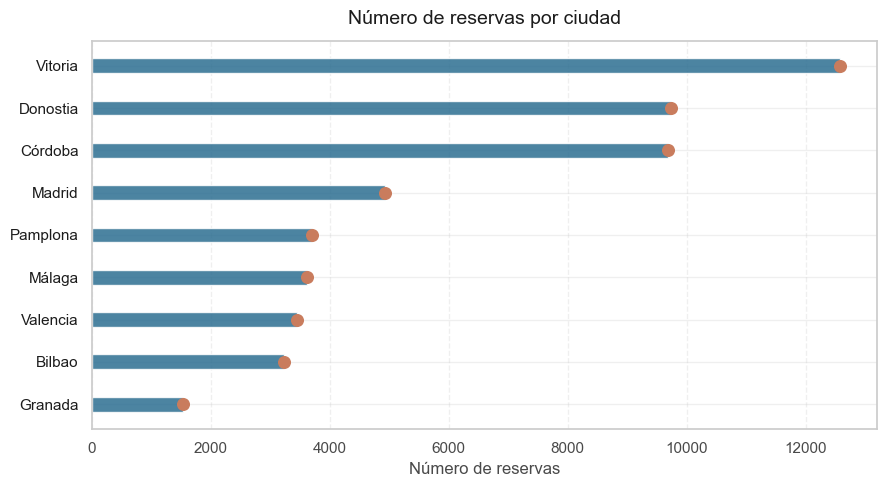

In [114]:

city_counts = df['city'].value_counts()

plt.figure(figsize=(9, 5))

# Colores tomados de la paleta
bar_color = palette_hospitality[1]     # Azul principal
point_color = palette_hospitality[6]   # Acento cálido
title_color = palette_hospitality[11]  # Negro
label_color = palette_hospitality[8]   # Gris oscuro

# Barras horizontales
plt.barh(
    city_counts.index,
    city_counts.values,
    height=0.35,
    color=bar_color,
    alpha=0.85
)

# Punto final
plt.scatter(
    city_counts.values,
    city_counts.index,
    s=70,
    color=point_color,
    zorder=3
)

# Títulos y etiquetas
plt.title(
    "Número de reservas por ciudad",
    pad=12,
    color=title_color
)
plt.xlabel("Número de reservas", color=label_color)
plt.ylabel("")

# Grid y ejes
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()

# Ajuste fino de ticks
plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=title_color)

plt.tight_layout()
plt.show()


### Ingresos totales por ciudad

Este gráfico analiza la contribución económica de cada ciudad, agregando el valor neto de todas las reservas realizadas en cada una de ellas.

Permite identificar qué ciudades generan mayores ingresos totales, independientemente del volumen de reservas, reflejando posibles diferencias en precios, duración de las estancias o perfil de cliente.


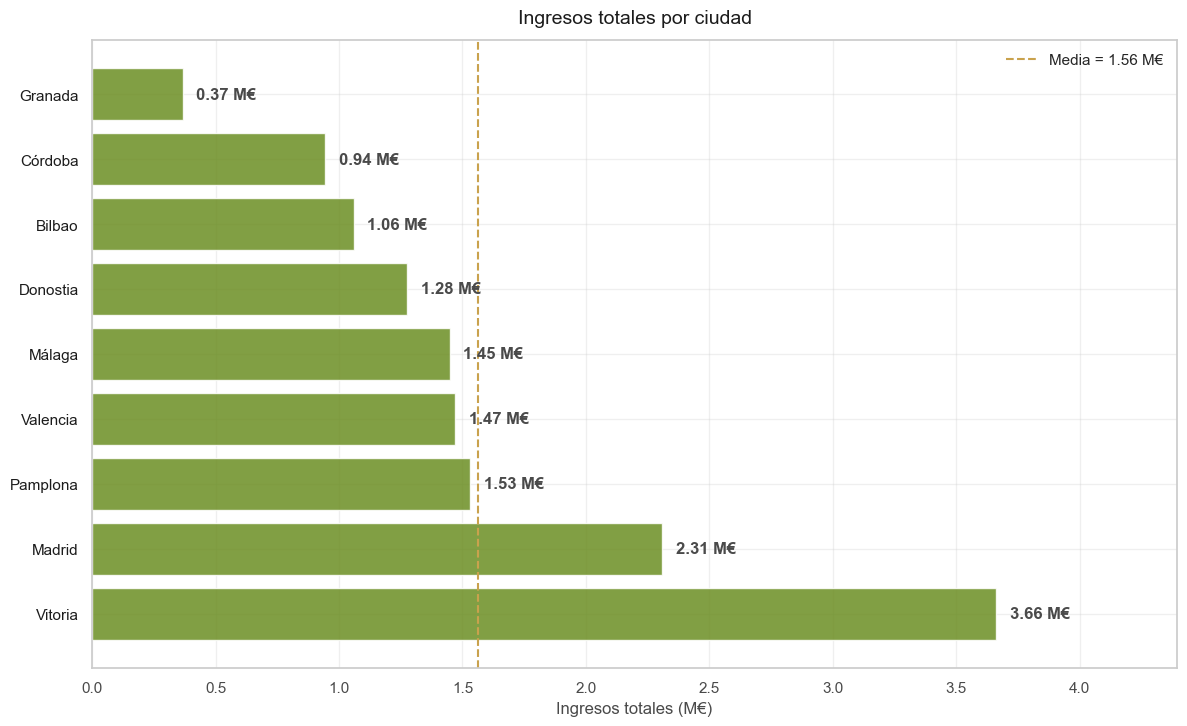

In [115]:
# Datos: ingresos totales por ciudad
ingresos_ciudad = (
    df.groupby('city')['reservation_net_value']
      .sum()
      .sort_values(ascending=False)
)

cities = ingresos_ciudad.index
values = ingresos_ciudad.values

# Convertimos a millones de euros
values_m = values / 1_000_000

# Colores desde la paleta
bar_color   = palette_hospitality[2]   # Verde principal
mean_color  = palette_hospitality[7]   # Acento dorado
text_color  = palette_hospitality[8]   # Gris oscuro
title_color = palette_hospitality[11]  # Negro

# Ajuste de tamaño de figura según número de ciudades
plt.figure(figsize=(12, 0.6 * len(cities) + 2))

# Barras horizontales
bars = plt.barh(
    cities,
    values_m,
    alpha=0.85,
    color=bar_color
)

# Valores al final de cada barra
max_value_m = values_m.max()
for bar, val_m in zip(bars, values_m):
    plt.text(
        val_m + max_value_m * 0.015,
        bar.get_y() + bar.get_height() / 2,
        f"{val_m:,.2f} M€",
        va='center',
        fontsize=12,
        fontweight='bold',
        color=text_color
    )

# Línea de la media
mean_val_m = values_m.mean()
plt.axvline(
    mean_val_m,
    color=mean_color,
    linestyle='--',
    linewidth=1.5,
    label=f"Media = {mean_val_m:,.2f} M€"
)

# Etiquetas y título
plt.xlabel("Ingresos totales (M€)", color=text_color)
plt.title(
    "Ingresos totales por ciudad",
    color=title_color,
    pad=12
)

# Leyenda
plt.legend(frameon=False)

# Estética de ejes
plt.tick_params(axis='x', colors=text_color)
plt.tick_params(axis='y', colors=title_color)

# Márgenes para evitar cortes
plt.xlim(0, max_value_m * 1.2)

plt.tight_layout()
plt.show()


### Relación entre volumen de reservas e ingresos por ciudad

Este gráfico relaciona el número de reservas con los ingresos totales por ciudad, permitiendo identificar diferencias entre destinos con alto volumen y destinos con mayor valor económico.

Las líneas de referencia indican los valores medios, facilitando la identificación de ciudades que se sitúan por encima o por debajo de la media en ambas dimensiones.


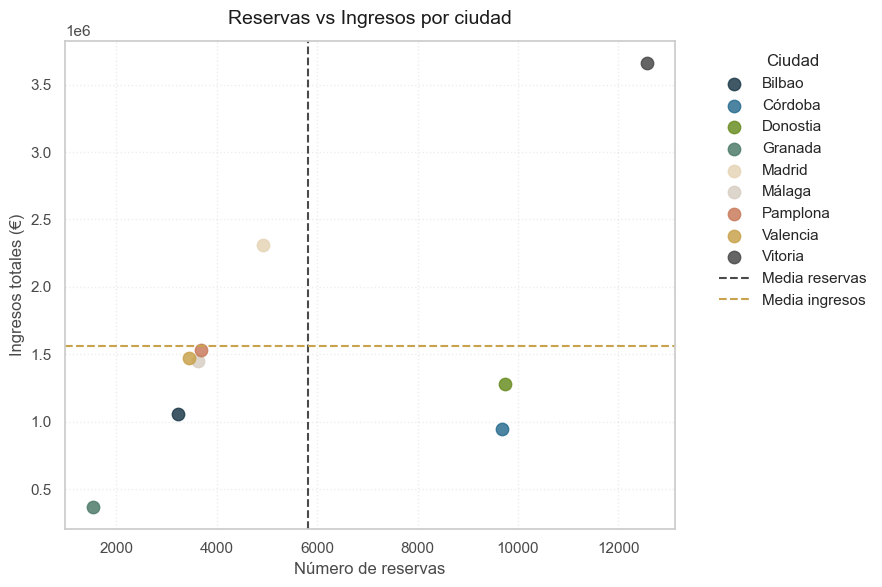

In [116]:
city_stats = (
    df.groupby('city')
      .agg(
          reservas=('reservation_net_value', 'count'),
          ingresos=('reservation_net_value', 'sum')
      )
)

plt.figure(figsize=(9, 6))

# Crear ciclo de colores de la paleta
from itertools import cycle
color_cycle = cycle(palette_hospitality)

# Scatter por ciudad con colores de la paleta
for city, row in city_stats.iterrows():
    plt.scatter(
        row['reservas'],
        row['ingresos'],
        s=80,
        alpha=0.85,
        label=city,
        color=next(color_cycle)
    )

# Líneas de la media con colores de la paleta
plt.axvline(
    city_stats['reservas'].mean(),
    linestyle='--',
    color=palette_hospitality[8],  # gris medio
    linewidth=1.5,
    label="Media reservas"
)

plt.axhline(
    city_stats['ingresos'].mean(),
    linestyle='--',
    color=palette_hospitality[7],  # acento cálido
    linewidth=1.5,
    label="Media ingresos"
)

# Títulos y etiquetas
plt.title(
    "Reservas vs Ingresos por ciudad",
    color=palette_hospitality[11],
    pad=12
)
plt.xlabel("Número de reservas", color=palette_hospitality[8])
plt.ylabel("Ingresos totales (€)", color=palette_hospitality[8])

# Grid sutil
plt.grid(True, linestyle=':', alpha=0.35)

# Leyenda externa
plt.legend(
    title="Ciudad",
    frameon=False,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Ticks
plt.tick_params(axis='both', colors=palette_hospitality[8])

plt.tight_layout()
plt.show()


### Distribución del ingreso medio por noche (ADR) según ciudad

Este gráfico analiza la distribución del ingreso medio por noche (ADR) en cada ciudad.

La línea horizontal representa la mediana global del ADR, facilitando la comparación entre ciudades y la identificación de destinos con precios estructuralmente más elevados.


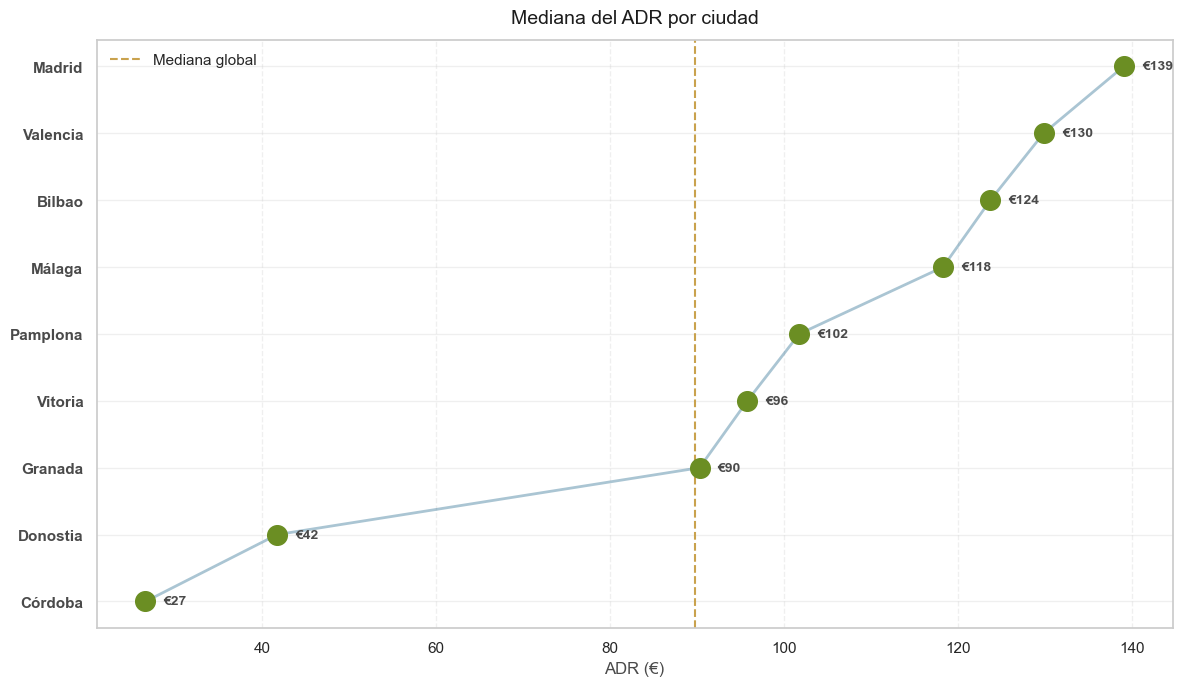

In [117]:
cities = df.groupby('city')['total_adr'].median().sort_values(ascending=False)
values = cities.values
y_pos = np.arange(len(cities))

plt.figure(figsize=(12, 7))

# Colores desde la paleta
line_color  = palette_hospitality[1]  # azul para línea
point_color = palette_hospitality[2]  # verde para puntos
median_color = palette_hospitality[7] # acento dorado para línea global
text_color  = palette_hospitality[8]  # gris oscuro para textos

# Línea suavizada de valores
plt.plot(values, y_pos, linewidth=2, alpha=0.4, color=line_color)

# Puntos destacados
plt.scatter(values, y_pos, s=200, zorder=3, color=point_color)

# Línea de mediana global
plt.axvline(
    df['total_adr'].median(),
    linestyle='--',
    linewidth=1.5,
    color=median_color,
    label="Mediana global"
)

# Etiquetas de valor al final de cada punto
max_val = values.max()
for i, val in enumerate(values):
    plt.text(
        val + max_val * 0.015,
        y_pos[i],
        f"€{val:,.0f}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

# Ejes y ticks
plt.yticks(y_pos, cities.index, fontsize=11, fontweight='bold', color=text_color)
plt.xlabel("ADR (€)", color=text_color)
plt.title("Mediana del ADR por ciudad", pad=12, color=palette_hospitality[11])

# Leyenda
plt.legend(frameon=False)

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Ingreso medio por reserva según ciudad

Este gráfico muestra el ingreso medio por reserva en cada ciudad, permitiendo detectar aquellas localizaciones que generan mayor valor económico por cliente.

Este análisis resulta clave para estrategias de pricing y segmentación, ya que una ciudad con menor volumen de reservas puede presentar una mayor rentabilidad por operación individual.


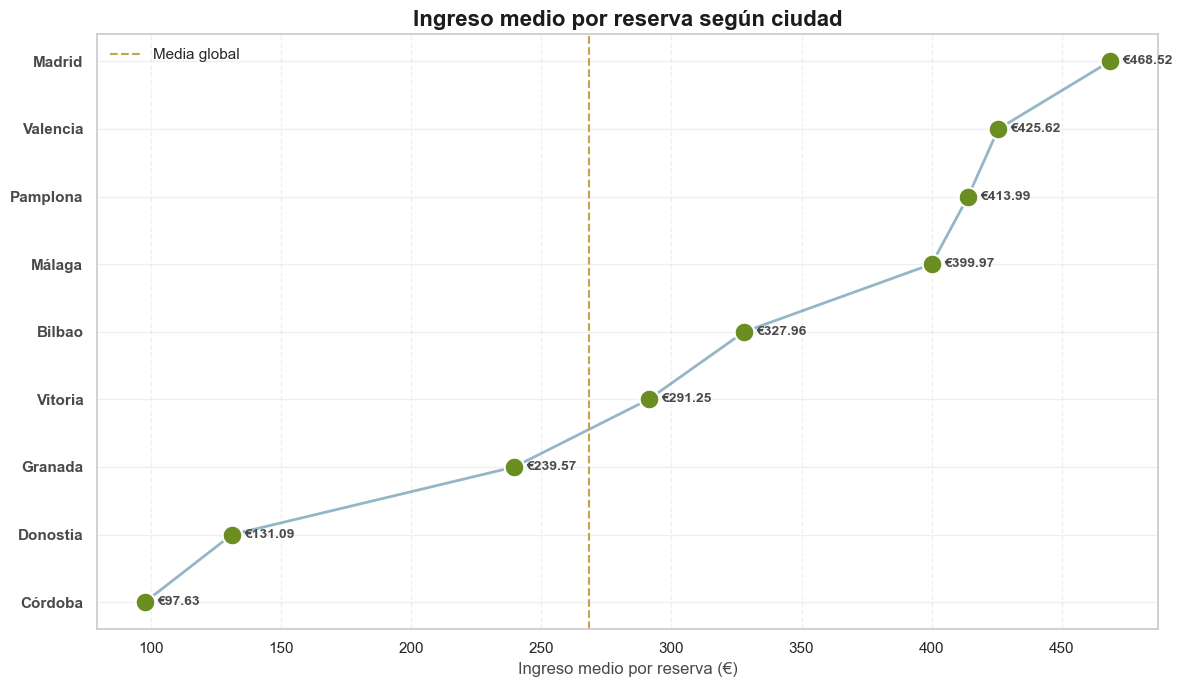

In [118]:
# Datos: ingreso medio por ciudad
ingreso_medio = (
    df.groupby('city')['reservation_net_value']
      .mean()
      .sort_values(ascending=False)
)

values = ingreso_medio.values
y_pos = np.arange(len(ingreso_medio))

plt.figure(figsize=(12, 7))

# Colores desde la paleta
line_color   = palette_hospitality[1]  # azul suave para línea
point_color  = palette_hospitality[2]  # verde para puntos
mean_color   = palette_hospitality[7]  # acento dorado para media global
text_color   = palette_hospitality[8]  # gris oscuro para textos
title_color  = palette_hospitality[11] # negro para título

# Línea conectando los puntos
plt.plot(values, y_pos, color=line_color, linewidth=2, alpha=0.5)

# Puntos de cada ciudad
plt.scatter(
    values, y_pos,
    s=200,
    color=point_color,
    edgecolor="white",
    linewidth=1.5,
    zorder=3
)

# Línea de media global
mean_val = df['reservation_net_value'].mean()
plt.axvline(mean_val, color=mean_color, linestyle='--', linewidth=1.5, label='Media global')

# Etiquetas al lado de cada punto
for i, val in enumerate(values):
    plt.text(
        val + max(values)*0.01,
        y_pos[i],
        f"€{val:,.2f}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

# Configuración de ejes y títulos
plt.yticks(y_pos, ingreso_medio.index, fontsize=11, fontweight='bold', color=text_color)
plt.xlabel("Ingreso medio por reserva (€)", fontsize=12, color=text_color)
plt.title("Ingreso medio por reserva según ciudad", fontsize=16, fontweight='bold', color=title_color)

# Leyenda
plt.legend(frameon=False)

# Invertimos eje Y para que ciudad con más ingreso quede arriba
plt.gca().invert_yaxis()

# Grid opcional
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Hoteles con mayores ingresos totales

En este gráfico se identifican los hoteles (assets) que generan mayores ingresos totales dentro de la cadena.

Estos activos pueden considerarse estratégicos para el negocio, ya que concentran una parte significativa de los ingresos y cualquier variación en su comportamiento tiene un impacto económico relevante.


C:\Users\garat\AppData\Local\Temp\ipykernel_43552\1395348949.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


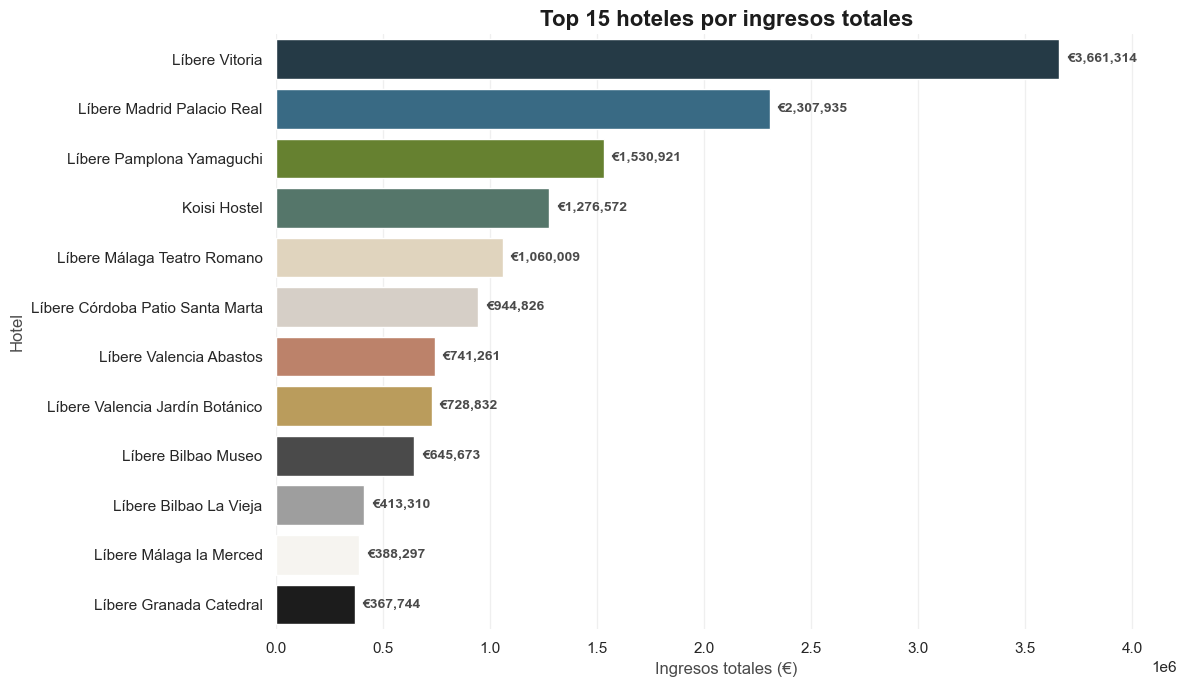

In [119]:
top_assets = (
    df.groupby('asset')['reservation_net_value']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12, 7))

# Ciclo de colores de la paleta
from itertools import cycle
color_cycle = cycle(palette_hospitality)

# Crear lista de colores para cada barra
bar_colors = [next(color_cycle) for _ in range(len(top_assets))]

# Barras horizontales con Seaborn usando paleta personalizada
sns.barplot(
    x=top_assets.values,
    y=top_assets.index,
    palette=bar_colors,
    edgecolor="white"
)

# Etiquetas de valor al final de cada barra
for i, val in enumerate(top_assets.values):
    plt.text(
        val + max(top_assets.values)*0.01,
        i,
        f"€{val:,.0f}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  # gris oscuro
    )

# Títulos y etiquetas
plt.title(
    "Top 15 hoteles por ingresos totales",
    fontsize=16,
    fontweight='bold',
    color=palette_hospitality[11]  # negro
)
plt.xlabel("Ingresos totales (€)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Hotel", fontsize=12, color=palette_hospitality[8])
plt.xlim(0, max(top_assets.values) * 1.15)

# Estética Seaborn
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### Tasa global de cancelación

Antes de analizar patrones específicos, se calcula la tasa global de cancelación del conjunto de reservas.

Este valor sirve como referencia general del problema y permite contextualizar los análisis posteriores relacionados con el comportamiento de cancelación de los usuarios.


In [120]:
df['ha_cancelado'].value_counts(normalize=True) * 100


ha_cancelado
False    75.616778
True     24.383222
Name: proportion, dtype: float64

### Tasa de cancelación por ciudad

Este gráfico muestra la probabilidad de cancelación de las reservas en función de la ciudad en la que se encuentra el hotel.

Las diferencias observadas entre ciudades sugieren que el contexto turístico, el tipo de cliente o las características del destino influyen en el comportamiento de cancelación.


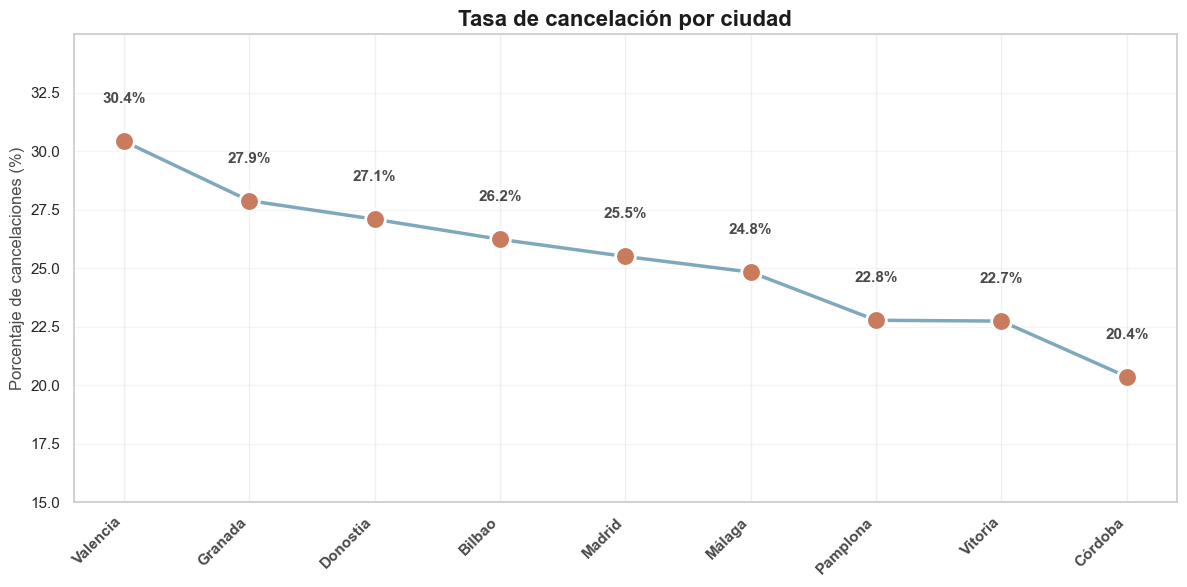

In [121]:
cancel_city = (
    df.groupby('city')['ha_cancelado']
      .mean()
      .sort_values(ascending=False)
)

cities = cancel_city.index
values = cancel_city.values * 100
x = np.arange(len(cities))

plt.figure(figsize=(12, 6))

# Colores desde la paleta
line_color  = palette_hospitality[1]  # azul para línea
point_color = palette_hospitality[6]  # cálido para puntos
text_color  = palette_hospitality[8]  # gris oscuro para etiquetas
title_color = palette_hospitality[11] # negro para título

# Conexión suave entre puntos
plt.plot(x, values, color=line_color, linewidth=2.5, alpha=0.6)

# Puntos destacados
plt.scatter(x, values, s=200, color=point_color, edgecolor="white", linewidth=2, zorder=3)

# Etiquetas de valor
for xi, val in zip(x, values):
    plt.text(
        xi, val + 1.5,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color=text_color
    )

# Eje X con nombres de ciudades
plt.xticks(x, cities, rotation=45, ha='right', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel("Porcentaje de cancelaciones (%)", fontsize=12, color=text_color)
plt.title("Tasa de cancelación por ciudad", fontsize=16, fontweight='bold', color=title_color)

plt.ylim(15, max(values) * 1.15)
plt.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()


### Cancelación según antelación de la reserva (lead time)

Este gráfico analiza la relación entre la antelación con la que se realiza la reserva (lead time) y la probabilidad de cancelación.

Se observa que las reservas realizadas con mayor antelación tienden a presentar una mayor propensión a cancelarse, lo que puede explicarse por una mayor incertidumbre en los planes del cliente.


### Cancelación según tipo de tarifa

Este gráfico muestra cómo el tipo de tarifa influye en la tasa de cancelación de las reservas.

Las tarifas flexibles suelen presentar mayores niveles de cancelación, mientras que las tarifas no reembolsables actúan como un mecanismo de reducción del riesgo para la empresa.


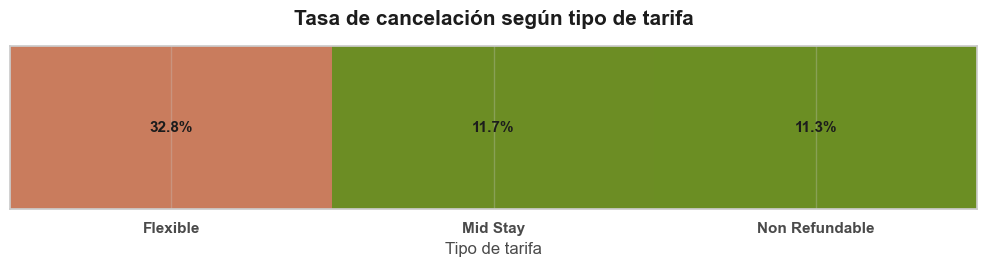

In [122]:
cancel_rate = (
    df.groupby('rate_type')['ha_cancelado']
      .mean()
      .sort_values(ascending=False)
)

values = cancel_rate.values * 100
labels = cancel_rate.index

# Transformar a 2D para imshow
data = values.reshape(1, -1)

plt.figure(figsize=(10, 2.8))

# Usamos colores de la paleta directamente, interpolando según valor
# Creamos un gradiente desde color bajo (verde) a alto (cálido)
from matplotlib.colors import LinearSegmentedColormap

grad_cmap = LinearSegmentedColormap.from_list(
    "cancel_palette",
    [palette_hospitality[2], palette_hospitality[6]]  # verde → cálido
)

im = plt.imshow(
    data,
    cmap=grad_cmap,
    aspect="auto"
)

# Ejes
plt.yticks([])
plt.xticks(np.arange(len(labels)), labels, fontsize=11, fontweight='bold', color=palette_hospitality[8])

# Anotaciones de valor
for i, val in enumerate(values):
    plt.text(
        i, 0,
        f"{val:.1f}%",
        ha="center",
        va="center",
        fontsize=11,
        fontweight="bold",
        color=palette_hospitality[11]  # negro para contraste
    )

# Títulos
plt.title(
    "Tasa de cancelación según tipo de tarifa",
    fontsize=15,
    fontweight="bold",
    pad=15,
    color=palette_hospitality[11]
)
plt.xlabel("Tipo de tarifa", color=palette_hospitality[8], fontsize=12)

plt.tight_layout()
plt.show()


### Evolución de la tasa de cancelación según el lead time

Este gráfico muestra cómo varía la tasa de cancelación en función de la antelación de la reserva, agrupando el lead time en tramos.

La línea permite identificar tendencias claras y posibles umbrales a partir de los cuales la probabilidad de cancelación aumenta de forma significativa.


C:\Users\garat\AppData\Local\Temp\ipykernel_43552\2890984180.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_grouped')['ha_cancelado']


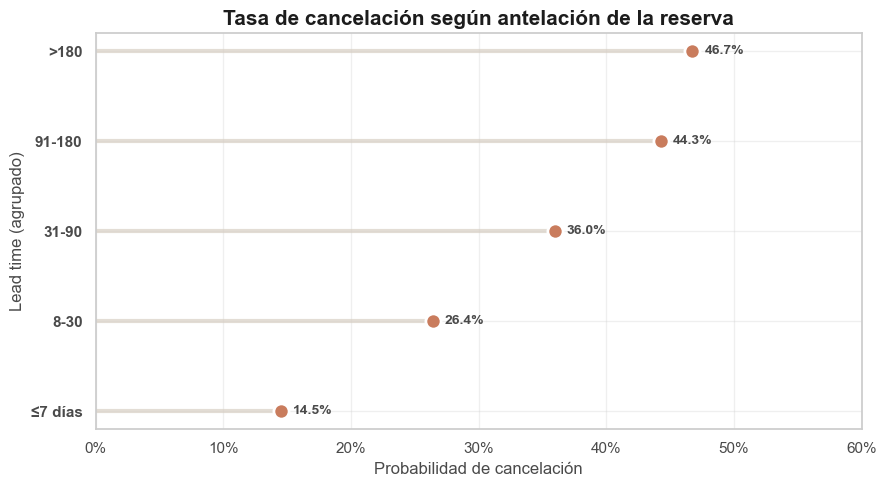

In [123]:
df['lead_time_grouped'] = pd.cut(
    df['lead_time'],
    bins=[0, 7, 30, 90, 180, df['lead_time'].max()],
    labels=['≤7 días', '8-30', '31-90', '91-180', '>180']
)

cancel_lead = (
    df.groupby('lead_time_grouped')['ha_cancelado']
      .mean()
)

y_pos = np.arange(len(cancel_lead.index))
values = cancel_lead.values

plt.figure(figsize=(9, 5))

# Colores desde la paleta
line_color  = palette_hospitality[5]  # púrpura suave para línea
point_color = palette_hospitality[6]  # cálido para puntos
text_color  = palette_hospitality[8]  # gris oscuro para textos
title_color = palette_hospitality[11] # negro para título

# Líneas horizontales
plt.hlines(
    y=y_pos,
    xmin=0,
    xmax=values,
    color=line_color,
    alpha=0.7,
    linewidth=3
)

# Puntos al final de cada línea
plt.scatter(
    values,
    y_pos,
    color=point_color,
    s=120,
    edgecolor="white",
    linewidth=2,
    zorder=3
)

# Etiquetas de valor
for i, val in enumerate(values):
    plt.text(
        val + (values.max() * 0.02),
        i,
        f"{val:.1%}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

# Ejes y ticks
plt.yticks(y_pos, cancel_lead.index, fontsize=11, fontweight='bold', color=text_color)
plt.xlim(0, values.max() * 1.15)

# Ticks X en porcentaje
ticks = plt.xticks()[0]
plt.xticks(ticks, [f"{t*100:.0f}%" for t in ticks], color=text_color)

# Títulos y etiquetas
plt.title(
    "Tasa de cancelación según antelación de la reserva",
    fontsize=15,
    fontweight='bold',
    color=title_color
)
plt.xlabel("Probabilidad de cancelación", color=text_color)
plt.ylabel("Lead time (agrupado)", color=text_color)

# Grid ligera
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Cancelación según temporada de estancia

Este gráfico analiza la probabilidad de cancelación en función de la temporada en la que se produce la estancia.

Permite identificar diferencias estacionales en el comportamiento del cliente, que pueden estar relacionadas con la demanda turística o la planificación del viaje.


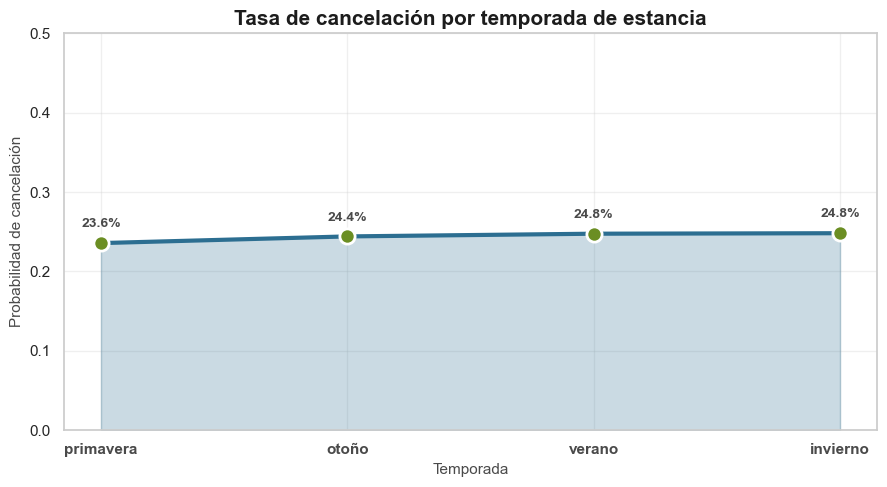

In [124]:
cancel_season = (
    df.groupby('estacion_estancia')['ha_cancelado']
      .mean()
      .sort_values()
)

x = np.arange(len(cancel_season.index))
y = cancel_season.values

plt.figure(figsize=(9, 5))

# Colores desde la paleta
area_color  = palette_hospitality[1]  # azul suave para área
line_color  = palette_hospitality[1]  # azul principal para línea
point_color = palette_hospitality[2]  # verde/acento para puntos
text_color  = palette_hospitality[8]  # gris oscuro para textos
title_color = palette_hospitality[11] # negro para título

# Área degradada
plt.fill_between(
    x, y,
    color=area_color,
    alpha=0.25
)

# Línea principal
plt.plot(
    x, y,
    color=line_color,
    linewidth=3
)

# Puntos destacados
plt.scatter(
    x, y,
    s=120,
    color=point_color,
    edgecolor="white",
    linewidth=2,
    zorder=3
)

# Etiquetas de valor
for i, val in enumerate(y):
    plt.text(
        i, val + 0.02,
        f"{val:.1%}",
        ha='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

# Ejes
plt.xticks(x, cancel_season.index, fontsize=11, fontweight='bold', color=text_color)
plt.ylim(0, 0.5)
plt.xlabel("Temporada", fontsize=11, color=text_color)
plt.ylabel("Probabilidad de cancelación", fontsize=11, color=text_color)

# Título
plt.title(
    "Tasa de cancelación por temporada de estancia",
    fontsize=15,
    fontweight='bold',
    color=title_color
)

# Grid
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Relación entre valor de la reserva y probabilidad de cancelación

Este gráfico analiza cómo varía la tasa de cancelación en función del valor económico de la reserva, agrupando el valor en cuantiles.

Permite evaluar si las reservas de mayor importe presentan comportamientos diferenciados respecto a las de menor valor.


C:\Users\garat\AppData\Local\Temp\ipykernel_43552\32632742.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('value_quantile')['ha_cancelado']
C:\Users\garat\AppData\Local\Temp\ipykernel_43552\32632742.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


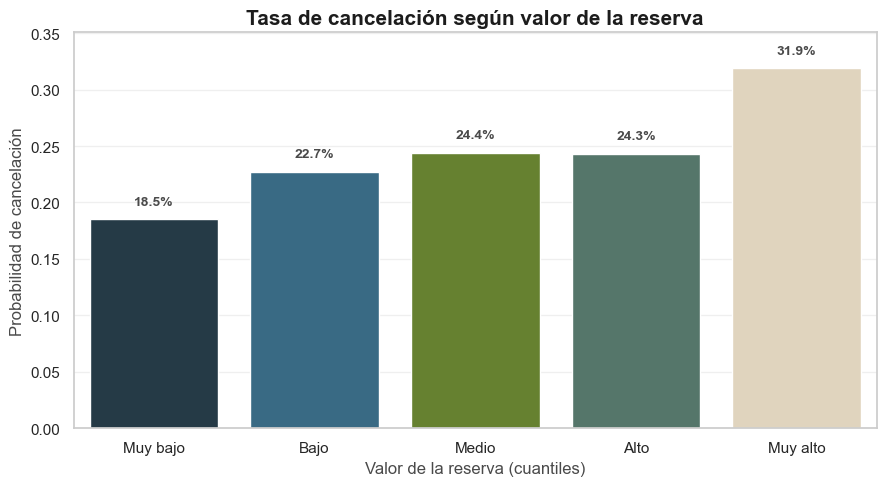

In [125]:
df['value_quantile'] = pd.qcut(
    df['reservation_net_value'],
    q=5,
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
)

cancel_value = (
    df.groupby('value_quantile')['ha_cancelado']
      .mean()
)

plt.figure(figsize=(9,5))

# Ciclo de colores de la paleta
from itertools import cycle
color_cycle = cycle(palette_hospitality)
bar_colors = [next(color_cycle) for _ in range(len(cancel_value))]

# Barras con Seaborn usando paleta personalizada
sns.barplot(
    x=cancel_value.index,
    y=cancel_value.values,
    palette=bar_colors,
    edgecolor="white"
)

# Etiquetas de valor encima de cada barra
for i, val in enumerate(cancel_value.values):
    plt.text(
        i,
        val + 0.01,
        f"{val:.1%}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  # gris oscuro
    )

# Títulos y etiquetas
plt.title(
    "Tasa de cancelación según valor de la reserva",
    fontsize=15,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Valor de la reserva (cuantiles)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Probabilidad de cancelación", fontsize=12, color=palette_hospitality[8])
plt.ylim(0, cancel_value.max() * 1.1)

# Grid opcional
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Diferencias de cancelación entre clientes nuevos y recurrentes

Este gráfico compara directamente la tasa de cancelación entre clientes nuevos y clientes recurrentes.

La línea horizontal representa la tasa media global de cancelación, facilitando la comparación visual.


C:\Users\garat\AppData\Local\Temp\ipykernel_43552\1032362650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


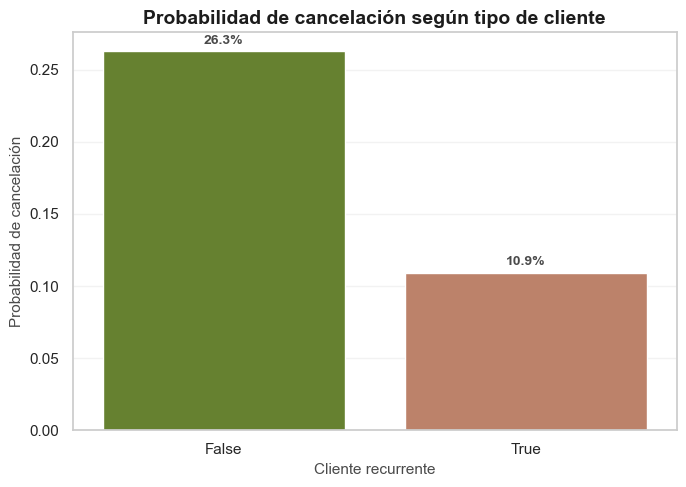

In [126]:
plt.figure(figsize=(7, 5))

# Colores desde la paleta
bar_colors = [palette_hospitality[2], palette_hospitality[6]]  # un color para cada categoría

sns.barplot(
    data=df,
    x='returning_inhabitant',
    y='ha_cancelado',
    palette=bar_colors,
    errorbar=None
)

# Etiquetas encima de cada barra, más cerca
for i, val in enumerate(df.groupby('returning_inhabitant')['ha_cancelado'].mean()):
    plt.text(
        i,
        val + 0.003,  # más cerca de la barra
        f"{val:.1%}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  # gris oscuro
    )

# Títulos y etiquetas
plt.title(
    "Probabilidad de cancelación según tipo de cliente",
    fontsize=14,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Cliente recurrente", fontsize=11, color=palette_hospitality[8])
plt.ylabel("Probabilidad de cancelación", fontsize=11, color=palette_hospitality[8])

# Grid ligera
plt.grid(axis='y', alpha=0.25)

plt.tight_layout()
plt.show()


### Valor económico de la reserva y cancelación

Este gráfico compara el valor económico de las reservas canceladas frente a las no canceladas.

Dado que existen valores extremos muy elevados que distorsionan la visualización, se han aplicado límites al eje vertical utilizando percentiles, lo que permite analizar el comportamiento general de las reservas sin que los outliers dominen el gráfico.


C:\Users\garat\AppData\Local\Temp\ipykernel_43552\1878406092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


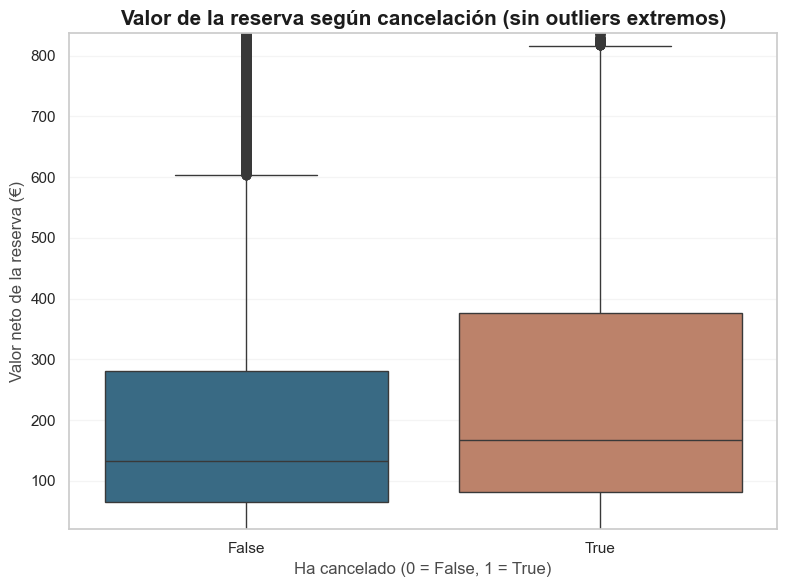

In [127]:
# Cálculo de límites usando percentiles para evitar outliers extremos
lim_inf = df['reservation_net_value'].quantile(0.05)
lim_sup = df['reservation_net_value'].quantile(0.95)

plt.figure(figsize=(8,6))

# Colores desde la paleta
box_colors = [palette_hospitality[1], palette_hospitality[6]]  # azul para No, cálido para Sí

sns.boxplot(
    data=df,
    x='ha_cancelado',
    y='reservation_net_value',
    palette=box_colors
)

# Limites para evitar outliers extremos
plt.ylim(lim_inf, lim_sup)

# Títulos y etiquetas
plt.title(
    "Valor de la reserva según cancelación (sin outliers extremos)",
    fontsize=15,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Ha cancelado (0 = False, 1 = True)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Valor neto de la reserva (€)", fontsize=12, color=palette_hospitality[8])

# Grid ligera para mejorar lectura
plt.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()


### Cancelación y recurrencia del cliente

Este gráfico analiza la relación entre la recurrencia del cliente y la probabilidad de cancelación.

Los clientes con estancias previas muestran, en general, una menor propensión a cancelar, lo que refuerza la importancia de los programas de fidelización y la relación a largo plazo con el cliente.


C:\Users\garat\AppData\Local\Temp\ipykernel_43552\1404763675.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('recurrence_grouped')['ha_cancelado']
C:\Users\garat\AppData\Local\Temp\ipykernel_43552\1404763675.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


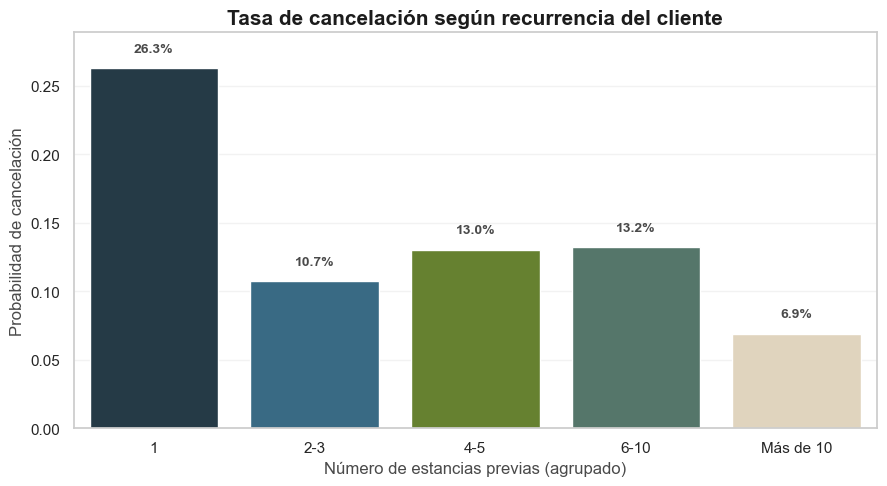

In [128]:

# Agrupamos la recurrencia en tramos para mejorar la interpretación
bins = [0, 1, 3, 5, 10, df['recurrence'].max()]
labels = ['1', '2-3', '4-5', '6-10', 'Más de 10']

df['recurrence_grouped'] = pd.cut(
    df['recurrence'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calcular tasa de cancelación por grupo de recurrencia
cancel_recurrence = (
    df.groupby('recurrence_grouped')['ha_cancelado']
      .mean()
)

plt.figure(figsize=(9,5))

# Crear ciclo de colores desde la paleta
color_cycle = cycle(palette_hospitality)
bar_colors = [next(color_cycle) for _ in range(len(cancel_recurrence))]

# Barras con Seaborn usando paleta personalizada
sns.barplot(
    x=cancel_recurrence.index,
    y=cancel_recurrence.values,
    palette=bar_colors,
    edgecolor="white"
)

# Etiquetas de valor encima de cada barra
for i, val in enumerate(cancel_recurrence.values):
    plt.text(
        i,
        val + 0.01,  # cerca de la barra
        f"{val:.1%}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  # gris oscuro
    )

# Títulos y etiquetas
plt.title(
    "Tasa de cancelación según recurrencia del cliente",
    fontsize=15,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Número de estancias previas (agrupado)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Probabilidad de cancelación", fontsize=12, color=palette_hospitality[8])

plt.ylim(0, cancel_recurrence.max() * 1.1)

# Grid ligera
plt.grid(axis='y', alpha=0.25)

plt.tight_layout()
plt.show()
